# University Dropout Rate and Average Houshold Income in NSW - A Visualisation

I thought that it would be intresting to visualise the relationship between the higher degree dropout rate of students from universities and the average household income in that suburb. However, I would like to point out that the main aim of this excersise is to showcase some of the geocoding pathways one could take to obtain the latitude and longitude of a suburb and plot that suburb on a world map.

All the data was mined from the [data Open Government](https://data.gov.au/) and the [Australian Bureau of Statistics](http://www.abs.gov.au/). The dropout rate is defined as the porpotion of students who did not complete a course and left the following year determined from the student ID.

I should also point out that the year 2013 is the latest data for dropout rate and I could find.

Null Hypothesis: There is no relationship between household income and university drop out rate.

### Importing the Data

Importing the dropout rate and average income as a dataframe and doing some cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
pd.options.mode.chained_assignment = None


dropout_data = pd.read_csv("nsw_attrition.csv") # Read csv file
dropout_data = dropout_data.set_index("LGA_code") # Set index to Local Government Area (LGA)
income_data = pd.read_csv("nsw_avg_income.csv", thousands=',') # Read csv file
income_data = income_data.set_index("LGA CODE") # Set index to LGA

df = pd.concat([dropout_data, income_data], axis=1,ignore_index=False) # Merge the two dataframes based on their LGA
df = df[0:152] # Drop data outside NSW
df = df.drop(["2005","2012","2013","LGA NAME"],axis=1) # Drop unnecessary columns
df = df[pd.notnull(df["LGA_name"])] # Drop rows that are NaN
df = df.rename(columns = {"LGA_name":"Suburb","2006":"drp_2006","2007":"drp_2007","2008":"drp_2008",
                         "2009":"drp_2009","2010":"drp_2010","2011":"drp_2011",
                         "2005-06":"icm_2006","2006-07":"icm_2007",
                          "2007-08":"icm_2008","2008-09":"icm_2009",
                         "2009-10":"icm_2010","2010-11":"icm_2011"}) # Rename columns
df = df.reset_index(drop=True) # Reset the index
#df[["icm_2006","icm_2007","icm_2008","icm_2009","icm_2010","icm_2011"]].astype(str)
for index,row in df.iterrows(): # Iterate through the data frame to remove bracket codes within the suburbs column
    df.set_value(index, 'Suburb', re.sub("\(.*?\)","",row["Suburb"])) # Remove brackets
    #row["icm_2006"] = row["icm_2006"].replace(",","")
    
    
    
    
df["lat"] = 0.0 # Adding a new column for latitude
df["lng"] = 0.0 # Adding a new column for longitude




df.set_value(36, 'Suburb',"Cooma-Monaro") # Fixed the name of the Suburb by adding "-"
df.head()

,Suburb,drp_2006,drp_2007,drp_2008,drp_2009,drp_2010,drp_2011,icm_2006,icm_2007,icm_2008,icm_2009,icm_2010,icm_2011,lat,lng
0,Albury,19.05,18.67,18.63,23.08,17.72,21.80,36981.0,38200.0,39192.0,41375.0,42514.0,45075.0,0.0,0.0
1,Armidale Dumaresq,20.06,22.86,16.92,20.63,21.21,24.87,34067.0,35312.0,36628.0,38521.0,40731.0,42891.0,0.0,0.0
2,Ashfield,17.22,15.12,13.69,16.16,14.45,14.40,44633.0,46350.0,47590.0,50112.0,51389.0,54483.0,0.0,0.0
3,Auburn,12.85,12.39,17.23,14.82,15.75,15.95,37204.0,38223.0,39173.0,40785.0,42054.0,44398.0,0.0,0.0
4,Ballina,21.04,25.67,23.28,20.16,21.14,22.08,32821.0,34234.0,35116.0,37248.0,39494.0,41275.0,0.0,0.0


### Geolocationing to find the latitude and longitude of each suburb
I have decided to use the python package [geopy](https://pypi.python.org/pypi/geopy/1.11.0) to obtain the latitude and longitude of each suburb using the OpenStreetMap geocoder. However, you are also free to use other geocoders such as Google, Bing, MapQuest and many others.

I should point out that geocoding for each suburb is not a fast process - for each suburb, we would need to send a request and wait for a response to obtain each latitude and longitude.

Therefore you might want to consider the simple method of obtaining the latitude and longitudes of each suburb from the [Australian Post](https://auspost.com.au/). The Australian Post offers .csv files that contain specific suburb related information (including the latitude and longitude) of all suburbs in Australia.

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [3]:
from IPython.display import clear_output
for index,row in df.iterrows():
    temp_add = row["Suburb"] + " NSW Australia"
    location = geolocator.geocode(temp_add,timeout=100)
    clear_output()
    print (round(index/len(df["Suburb"])*100,1), "percent complete")
    if location is not None:
        print("Not none")
        df.set_value(index, 'lat', location.latitude)
        df.set_value(index, 'lng', location.longitude)

99.3 percent complete
Not none


In [4]:
df = df[(df["lat"]!=0)] # Drop any lat (and therefore lng) values that are zero
df.head()

,Suburb,drp_2006,drp_2007,drp_2008,drp_2009,drp_2010,drp_2011,icm_2006,icm_2007,icm_2008,icm_2009,icm_2010,icm_2011,lat,lng
0,Albury,19.05,18.67,18.63,23.08,17.72,21.80,36981.0,38200.0,39192.0,41375.0,42514.0,45075.0,-36.014806,146.982171
1,Armidale Dumaresq,20.06,22.86,16.92,20.63,21.21,24.87,34067.0,35312.0,36628.0,38521.0,40731.0,42891.0,-30.514154,151.679146
2,Ashfield,17.22,15.12,13.69,16.16,14.45,14.40,44633.0,46350.0,47590.0,50112.0,51389.0,54483.0,-33.889478,151.127412
3,Auburn,12.85,12.39,17.23,14.82,15.75,15.95,37204.0,38223.0,39173.0,40785.0,42054.0,44398.0,-33.849302,151.032811
4,Ballina,21.04,25.67,23.28,20.16,21.14,22.08,32821.0,34234.0,35116.0,37248.0,39494.0,41275.0,-28.863465,153.561970


To plot the suburbs on a map, I am again using the OpenStreetMap API, with the [Folium](https://github.com/python-visualization/folium) python library.

In [5]:
import folium
map_nsw_icm = folium.Map(location=[-33, 147],tiles='Mapbox Bright',
           zoom_start=5)

folium.CircleMarker([-30, 150], popup='Mt. Hood Meadows').add_to(map_nsw_icm)


for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], 
                        radius = (row["icm_2011"]*0.5), # Radius of the suburbs based on 2011 average income, times a constant for normalisation
                        popup=row["Suburb"],
                        color='#3186cc',
                        fill_color='#3186cc').add_to(map_nsw_icm)
    
map_nsw_icm

In [6]:
map_nsw_drp = folium.Map(location=[-33, 147],tiles='Mapbox Bright',
           zoom_start=5)

folium.CircleMarker([-30, 150], popup='Mt. Hood Meadows').add_to(map_nsw_drp)


for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], 
                        radius = (row["drp_2011"]*500), # Radius of the suburbs based on 2011 dropout rate, times a constant for normalisation
                        popup=row["Suburb"],
                        color='#3186cc',
                        fill_color='#3186cc').add_to(map_nsw_drp)
    
map_nsw_drp


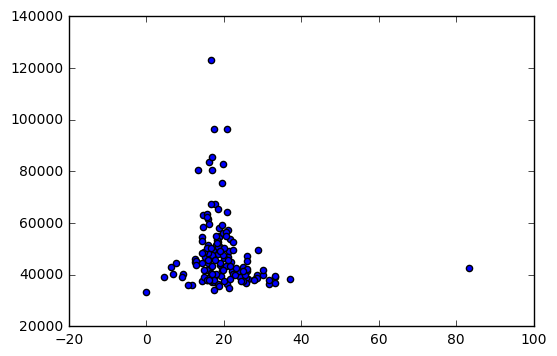

In [7]:
plt.scatter(df["drp_2011"],df["icm_2011"])
plt.show()

The scatter plot doesnt show much of a relationship between dropout rate and average household income. Lets take a look at the correlation between the dropout rate and average household income for 2011.

In [8]:
df[["drp_2011","icm_2011"]].corr()

,drp_2011,icm_2011
drp_2011,1.000000,-0.145665
icm_2011,-0.145665,1.000000


As expected from the figure, correlation calcuation shows that household income alone statistically plays an insignificant role in the university dropout rate.

### TO BE CONTINUED...